# Exploratory Data Analysis

В літературі по статистиці можна знайти не мало рекомендацій по виконанню розвідкового аналізу даних (EDA). Два роки тому в журналі Methods in Ecology and Evolution була опублікована відмінна стаття, в якій ці рекомендації містяться в єдиному протоколі за виконанням RDA: 
<p id='part0'></p>

>Zuur A. F., Ieno E. N., Elphick C. S. (2010) A protocol for data exploration to avoid common statistical problems. [Methods in Ecology and Evolution](https://besjournals.onlinelibrary.wiley.com/doi/10.1111/j.2041-210X.2009.00001.x) 1(1): 3-14. (Протокол для дослідження даних, щоб уникнути типових статистичних проблем. Методи в екології та еволюції 1(1): 3-14.) 

Незважаючи на те, що стаття написана для біологів (зокрема, для екологів), викладена в її принципах, безумовно, вірно та у відношенні інших наукових дисциплін.

Пропонований протокол включає такі основні елементи:
    
1 Формулювання дослідницької гіпотези. Проведення експериментів/спостереження для збору даних.

2 ***Розвідувальний аналіз даних:***

<table width="100%" cellspacing="0" cellpadding="0">
<tr> 
    <td id="leftcol">
        <ul style="padding-left: 0; margin-left: 0; text-align:center; font-size:1.5em;">
            <li style='list-style-type: none; margin-bottom: 1em;'><a href='#part1' style = "color:grey; text-decoration:none;">Виявлення точок викидів</a></li>
            <li style='list-style-type: none; margin-bottom: 1em;'><a href='#part1' style = "color:grey; text-decoration:none;">Перевірка однорідності дисперсій</a></li>
            <li style='list-style-type: none; margin-bottom: 1em;'><a href='#part1' style = "color:grey; text-decoration:none;">Перевірка нормальності розподілу даних</a></li>
            <li style='list-style-type: none; margin-bottom: 1em;'><a href='#part1' style = "color:grey; text-decoration:none;">Виявлення надмірної кількості нульових значень</a></li>
            <li style='list-style-type: none; margin-bottom: 1em;'><a href='#part1' style = "color:grey; text-decoration:none;">Виявлення колінеарних змінних</a></li>
            <li style='list-style-type: none; margin-bottom: 1em;'><a href='#part1' style = "color:grey; text-decoration:none;">Виявлення характеру зв'язку між аналізованими змінними</a></li>
            <li style='list-style-type: none; margin-bottom: 1em;'><a href='#part1' style = "color:grey; text-decoration:none;">Виявлення взаємодій між змінними предикторами</a></li>
            <li style='list-style-type: none; margin-bottom: 1em;'><a href='#part1' style = "color:grey; text-decoration:none;">Виявлення просторово-часових кореляцій серед значень залежної змінної</a></li>
        </ul>
    </td>
    <td id="rightcol">
        <img src='https://besjournals.onlinelibrary.wiley.com/cms/asset/890dd91b-444e-430b-b41b-c7edee6653fb/mee3_1_f1.gif'>
    </td>
</tr>
</table>

3 Застосування відповідного стану статистичного методу (моделі).

[Zuur та ін.](#part0) (2010) зазначають, що РДА найбільш ефективний при використанні різноманітних графічних засобів, оскільки графіки часто дозволяють краще зрозуміти структуру та властивості даних, що аналізуються, ніж формальні статистичні тести.

<p id='part1'></p>

# Виявлення точок викидів

Чутливість різних статистичних методів до наявності викидів у даних неоднакова. Так, при використанні [узагальненої лінійної моделі](https://en.wikipedia.org/wiki/Generalized_linear_model) для аналізу залежної змінної, розподіленої за [законом Пуассона](https://uk.wikipedia.org/wiki/Розподіл_Пуассона) (наприклад, кількість випадків будь-якого захворювання у різних містах), наявність викидів може спричинити надмірну дисперсію, що зробить модель непридатною. У той же час при використанні непараметричного [багатовимірного шкалювання](https://uk.wikipedia.org/wiki/Багатовимірне_шкалювання), заснованого на [індексі Жаккара](https://uk.wikipedia.org/wiki/Коефіцієнт_Жаккара), усі вихідні дані перетворюються на номінальну шкалу з двома значеннями (1/0), і наявність викидів не позначається на результат аналізу. Дослідник повинен чітко розуміти ці відмінності між різними методами та за необхідності виконувати перевірку на наявність викидів у даних. Дамо робоче визначення: під "викидом" ми розумітимемо спостереження, яке "надто" велике або "надто" мало в порівнянні з більшістю інших наявних спостережень.

Зазвичай виявлення викидів використовують [діаграми розмахів](https://uk.wikipedia.org/wiki/Коробковий_графік). При побудові діаграм розмахів використовуються стійкі (робасні) оцінки центральної тенденції (медіана) та розкиду (інтерквартильний розмах, IQR). Верхній "вус" простягається від верхньої межі "ящика" до найбільшого вибіркового значення, що знаходиться в межах відстані 1.5 х IQR від цього кордону. Аналогічно, нижній "вус" простягається від нижньої межі "ящика" до найменшого вибіркового значення, що знаходиться в межах відстані 1.5 х IQR від цього кордону. Спостереження, що знаходяться за межами "усів", розглядаються як потенційні викиди (Малюнок).

<img src='https://miro.medium.com/max/1200/1*2c21SkzJMf3frPXPAR_gZA.png' width="600" height="400">

Так графік **(а)** призводить до думки (можливо, помилкової, як ми невдовзі побачимо), що є сім викидів.

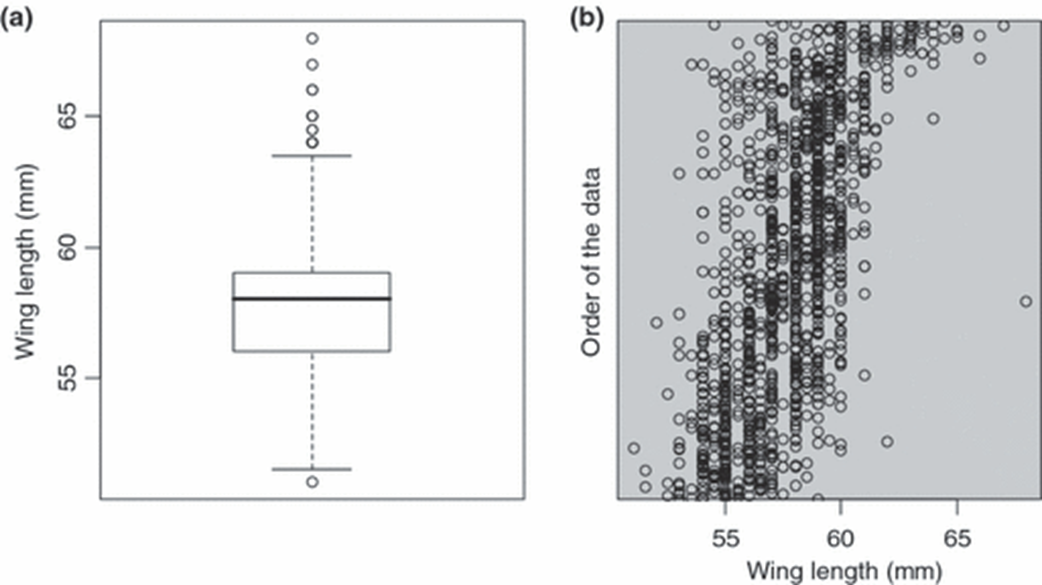

Іншим дуже корисним, але, на жаль, мало використовуваним графічним засобом виявлення виборосів є точкова діаграма Клівленда. На такому графіку по осі ординат відкладають порядкові номери окремих спостережень, а осі абсцис - значення цих спостережень. Спостереження, що "значно" виділяються з основної хмари точок, потенційно можуть бути викидами (Малюнок **(b)**).

На малюнку b добре виділяється точка, що відповідає довжині крила 68 мм. Однак це значення довжини крила не слід розглядати як викид, оскільки воно лише незначно відрізняється від інших значень довжини. Ця точка виділяється загальному фоні оскільки вихідні значення довжини крила були впорядковані за вагою птахів. Відповідно, викид швидше за все варто шукати серед значень ваги (тобто дуже високе значення довжини крила (68 мм) було відзначено у горобця з надто низькою вагою).

>До цього моменту ми називали **"викидом"** спостереження, яке "значно" відрізняється від більшості інших спостережень у досліджуваній сукупності. Однак суворіший підхід до визначення викидів полягає в оцінці того, який вплив ці незвичайні спостереження надають на результати аналізу. При цьому слід робити різницю між незвичайними спостереженнями для залежних і незалежних змінних (предикторів).

З незвичайними значеннями залежної змінної "боротися" складніше, особливо у побудові регресійних моделей. Перетворення шляхом, наприклад, логарифмування може допомогти, але оскільки залежна змінна представляє особливий інтерес при побудові регресійних моделей, краще спробувати підібрати метод аналізу, який заснований на розподілі ймовірностей, що допускає більший розкид значень для великих середніх величин (наприклад, гамма-розподіл для безперервних або розподіл Пуассона для дискретних кількісних змінних). Такий підхід дозволить працювати з вихідними значеннями залежною змінною.

<p id='part2'></p>

# Перевірка однорідності дисперсій

Однорідність групових дисперсій є важливою умовою застосування дисперсійного аналізу (ANOVA) та інших лінійних моделей регресійного типу, а також ряду методів багатовимірної статистики (наприклад, дискримінантного аналізу).
При побудові регресійних моделей перевірка умови однорідності дисперсії виконується шляхом графічного аналізу розподілу залишків: по осі ординат відкладають значення залишків, а осі абсцис - передбачувані моделлю середні значення залежної змінної. Крапки на такому графіку повинні розташовуватися випадковим чином, не формуючи будь-якого чіткого патерну. За наявності моделі номінальних змінних (факторів), для залишків будують категоризовані діаграми розмахів

Тест Левена це логічна статистика, що використовується для оцінки рівності дисперсій для змінної, розрахованої для двох або більше груп. Деякі поширені статистичні процедури припускають, що дисперсії популяцій, у тому числі взяті різні вибірки, рівні. Тест Левена оцінює це припущення. Він перевіряє нульову гіпотезу у тому, що дисперсії популяції рівні. Якщо результуюче p-значення тесту Левена менше деякого рівня значущості (зазвичай 0.05), отримані відмінності у вибіркових дисперсіях навряд чи мали місце на основі випадкової вибірки з популяції з рівними дисперсіями. Таким чином, нульова гіпотеза рівних дисперсій відкидається і робиться висновок про наявність різниці між дисперсіями у популяції.

In [3]:
from scipy import stats
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
URL = 'https://stepik.org/media/attachments/lesson/9250/atherosclerosis.csv'
atherosclerosis = pd.read_csv(URL)

def test_leven(*data1):
    test_leven, p = stats.levene(*data1)
    print('Statistics=%.3f, p-value=%.3f' % (test_leven, p))
    alpha = 0.05
    if p < alpha:
        print('Відхилити гіпотезу про рівність дисперсій')
    else:
        print('Прийняти гіпотезу про рівність дисперсій')
        
test_leven(atherosclerosis.query('age == 1').expr, 
           atherosclerosis.query('age == 2').expr, 
           atherosclerosis.query('dose == "D1"').expr,
           atherosclerosis.query('dose == "D1"').expr)        

Statistics=0.236, p-value=0.871
Прийняти гіпотезу про рівність дисперсій


eval_env: 1


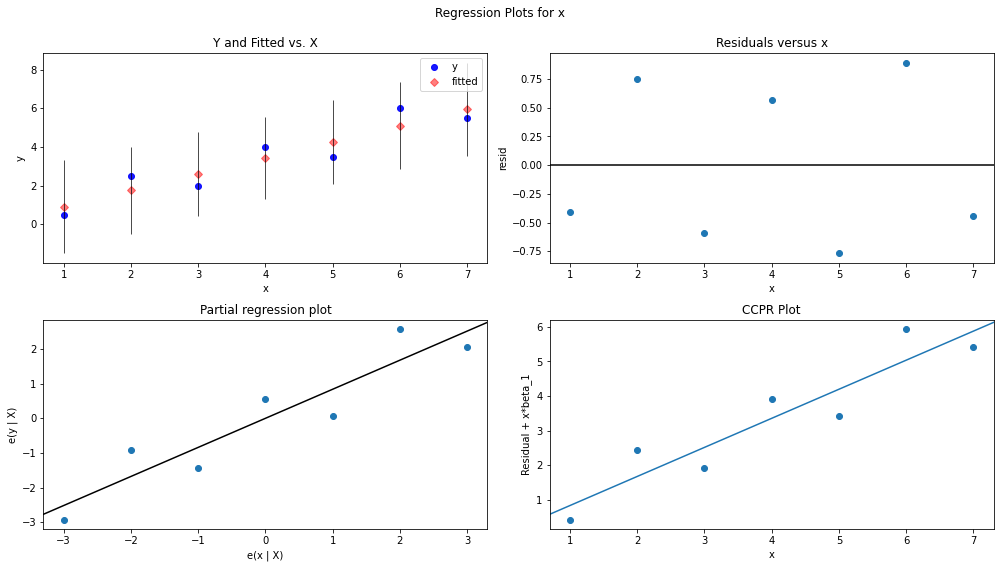

In [2]:
x = [1, 2, 3, 4, 5, 6, 7];
y = [0.5, 2.5, 2, 4, 3.5, 6, 5.5]

d = {'x':x, "y":y}

df = pd.DataFrame.from_dict(d)
model = smf.ols('y~x',data=df)
fitted = model.fit()

fig = plt.figure(figsize=(14, 8))
fig = sm.graphics.plot_regress_exog(fitted,
                                    'x',
                                    fig=fig)

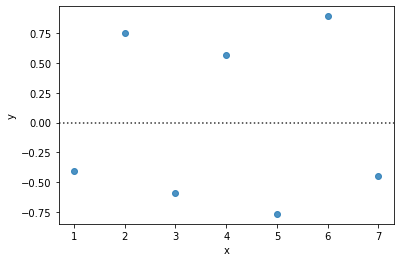

In [4]:
sns.residplot(x='x', y='y', data=df)
plt.show()

In [5]:
test_leven(x,y)

Statistics=0.134, p-value=0.721
Прийняти гіпотезу про рівність дисперсій


**Критерій Бартлетта** (англ. Bartlett's test) - статистичний критерій, що дозволяє перевіряти рівність дисперсій кількох (двох і більше) вибірок. Нульова гіпотеза передбачає, що аналізовані вибірки отримані з генеральних сукупностей, які мають однакові дисперсії.

Критерій Бартлетта є параметричним і ґрунтується на додатковому припущенні про нормальність вибірок даних. Тому перед застосуванням критерію Бартлетт рекомендується виконати перевірку нормальності. Критерій Бартлетта дуже чутливий до порушення цього припущення.

>**Плюси:**
обсяги вибірок можуть бути різними (це його перевага перед критерієм Кохрена),
критерій Бартлетта виявляє відхилення, як у більший, так і у менший бік;<br>
**Мінуси:**
складність обчислень (критерій Кохрена вимагає менше обчислювальних витрат. Особливо це актуально у разі обчислень «вручну»),
обсяг кожної вибірки має бути більше трьох,
критерій дуже чутливий до порушення припущення про нормальний закон розподілу вихідних даних.

In [7]:
def test_bartlett(*data1):
    bartlett, p = stats.bartlett(*data1)
    print('Statistics=%.3f, p-value=%.3f' % (bartlett, p))
    alpha = 0.05
    if p < alpha:
        print('Відхилити гіпотезу про рівність дисперсій')
    else:
        print('Прийняти гіпотезу про рівність дисперсій')
        
test_bartlett(x,y)

Statistics=0.060, p-value=0.806
Прийняти гіпотезу про рівність дисперсій


При виявленні суттєвої неоднорідності дисперсії можливі два рішення: певне перетворення вихідних даних (наприклад, логарифмування) або використання моделей, що допускають неоднорідність дисперсії (наприклад, моделі, що ґрунтуються на узагальненому методі найменших квадратів - Generalized Least Squares Models).

# [Перевірка розподілу на нормальність](https://github.com/pruhlo/notes-for-Data-Science/blob/master/Checking%20the%20distribution.ipynb)

Чи підпорядковуються аналізовані кількісні змінні закону нормального розподілу ймовірностей? Дуже багато статистичних методів передбачають позитивну відповідь на це питання (Zuur et al. 2010), і тому перевірка змінних, що досліджуються, на нормальність розподілу є важливою складовою розвідувального аналізу даних.

Перевіряючи умову нормальності розподілу даних, необхідно, проте, добре уявляти, у яких випадках його виконання є критичним застосування конкретного статистичного методу. Так, наприклад, метод головних компонентів (Principle Components Analysis, PCA) не вимагає, щоб дані були розподілені нормально (Joliffe 2002). Лінійна регресія (Linear Regression) хоч і передбачає нормальність розподілу залежної змінної, є досить роботним методом при незначних відхиленнях від цієї умови (Fitzmaurice et al. 2004). У той же час для успішного застосування дискримінантного аналізу (Discriminant Analysis) нормальність розподілу ознак у кожній групі об'єктів, що класифікуються, - умова обов'язкова (Huberty 1994).

In [ ]:
# https://r-analytics.blogspot.com/2012/06/blog-post_14.html#.VsMKybSLTmV
# http://www.machinelearning.ru/wiki/index.php?title=%D0%9A%D1%80%D0%B8%D1%82%D0%B5%D1%80%D0%B8%D0%B9_%D0%BE%D0%BC%D0%B5%D0%B3%D0%B0-%D0%BA%D0%B2%D0%B0%D0%B4%D1%80%D0%B0%D1%82

# Виявлення надмірної кількості нульових значень

[Елфік та Орінг (1998, 2003)](https://besjournals.onlinelibrary.wiley.com/doi/10.1046/j.1365-2664.1998.00274.x) досліджували вплив використання соломи на чисельність водоплавних птахів на затоплених рисових полях. Одним з можливих статистичних аналізів є моделювання кількості птахів залежно від часу, глибини води, ферми, методу управління полем, температури і т. д. Оскільки цей аналіз включає моделювання підрахунку, GLM є підходящим аналізом. На малюнку показаний частотний графік, що показує, як часто траплялося кожне значення загальної чисельності водно-болотних птахів. Надзвичайно велика кількість нулів говорить нам про те, що ми не повинні застосовувати звичайну пуассонівську або негативну біномну модель GLM, оскільки вони призведуть до зміщених оцінок параметрів та стандартних помилок. Натомість слід розглянути завищену нульову GLLM ( Cameron & Trivedi 1998 ; Zuur et al. 2009a ).).

<img src='https://besjournals.onlinelibrary.wiley.com/cms/asset/78816ecf-a517-4e06-929f-3241a0ea6b72/mee3_1_f7.gif' width="600" height="400">

<AxesSubplot:>

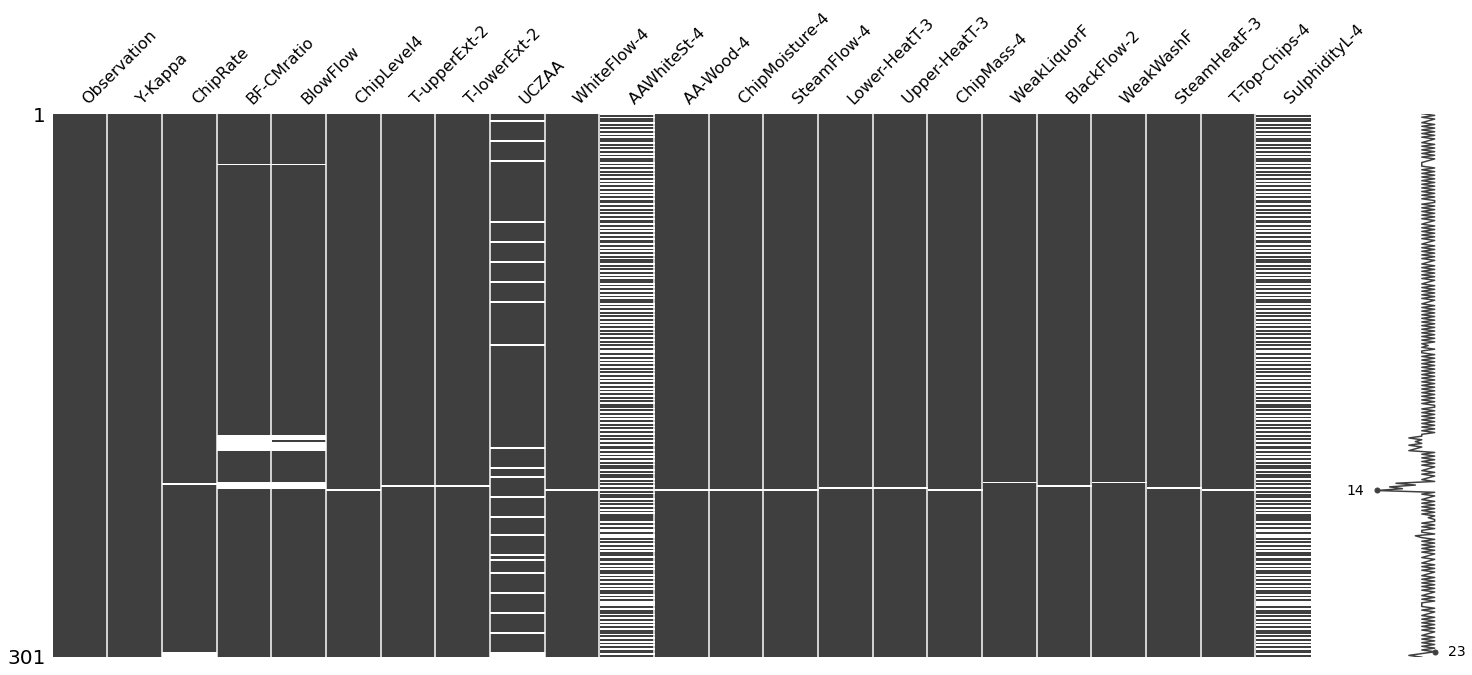

In [10]:
import pandas as pd
import missingno as msno
  
# Loading the dataset
url = 'https://openmv.net/file/kamyr-digester.csv'
df = pd.read_csv(url)
  
# Visualize missing values as a matrix
msno.matrix(df)

<AxesSubplot:>

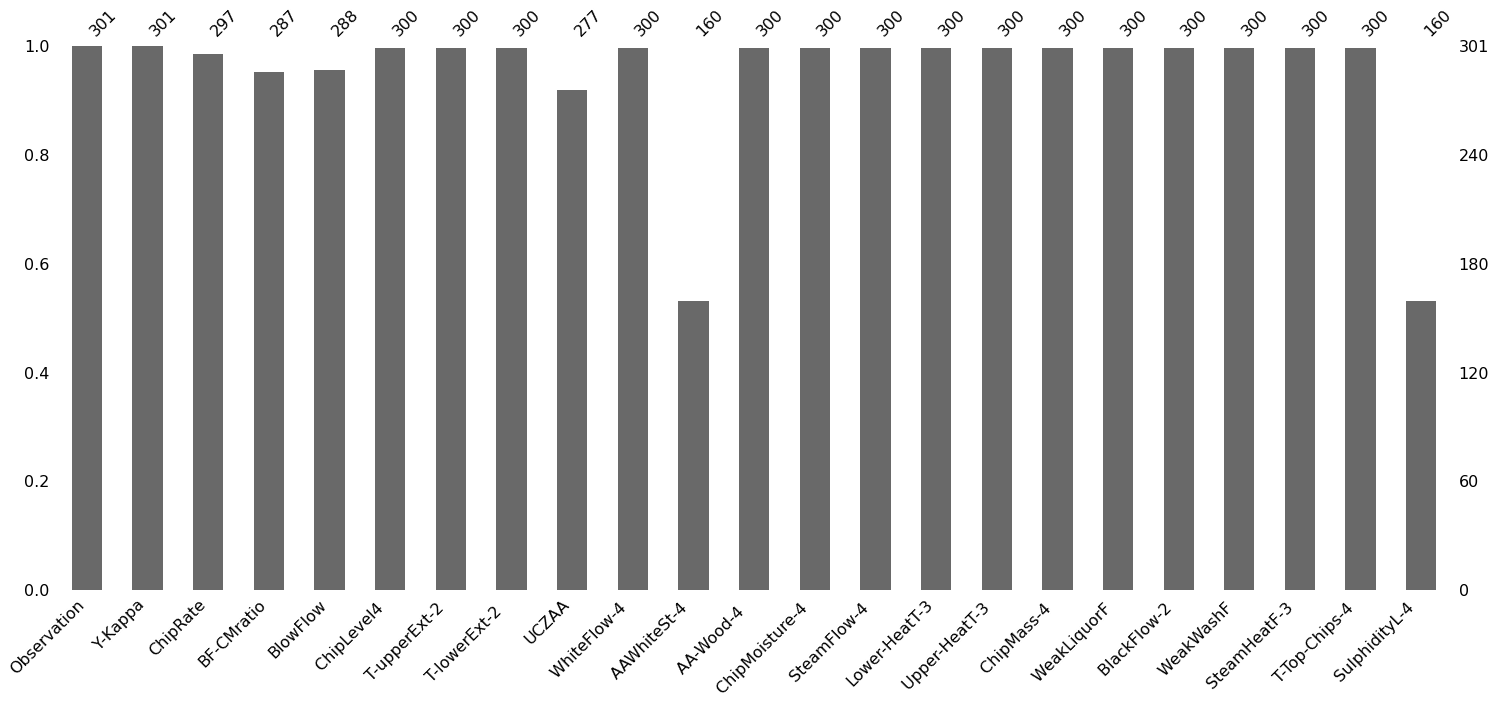

In [11]:
msno.bar(df)

<AxesSubplot:>

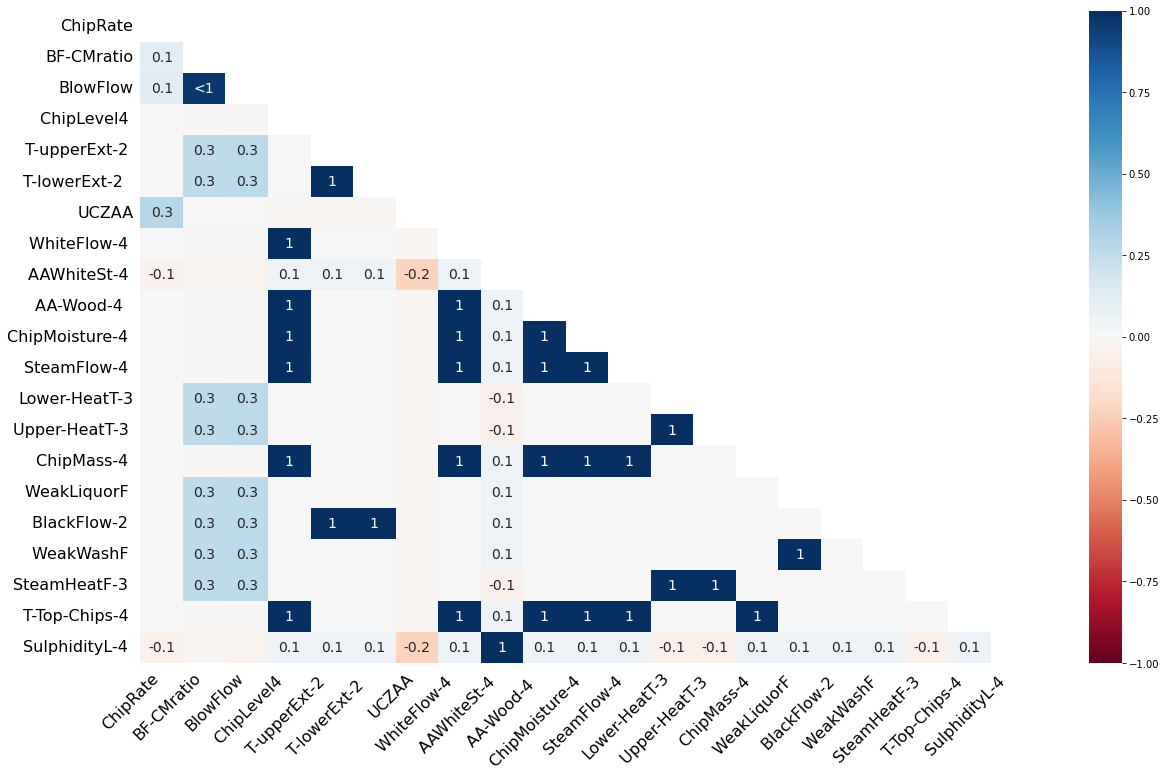

In [12]:
msno.heatmap(df)

In [26]:
# for R!!!
#!pip install rpy2
import rpy2.ipython
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


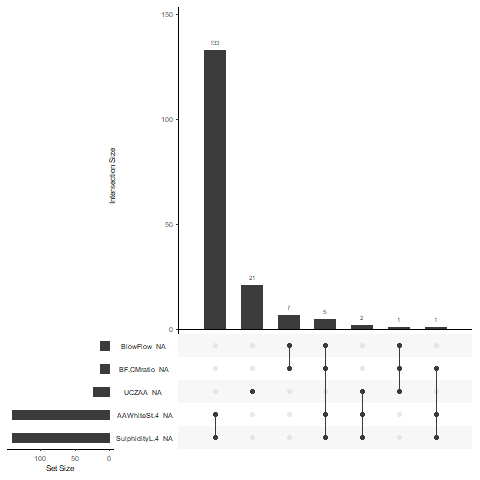

In [35]:
%%R
# naniar::vis_miss naniar::gg_miss_upset == > https://cran.r-project.org/web/packages/naniar/vignettes/naniar-visualisation.html
Rdf = read.csv('https://openmv.net/file/kamyr-digester.csv')
# gg_miss_upset(df)
naniar::gg_miss_upset(Rdf)
# https://epirhandbook.com/en/missing-data.html

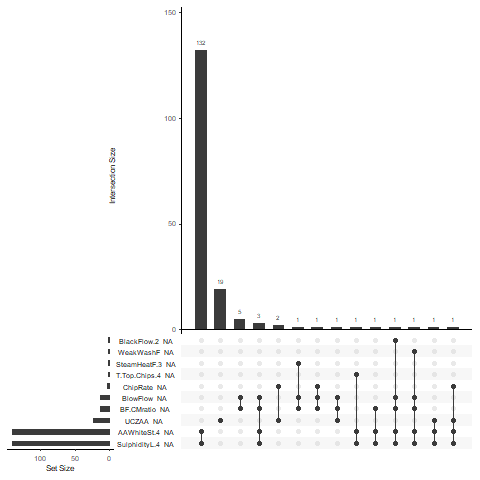

In [36]:
%%R
naniar::gg_miss_upset(Rdf, 
              nsets = 10,
              nintersects = 50)

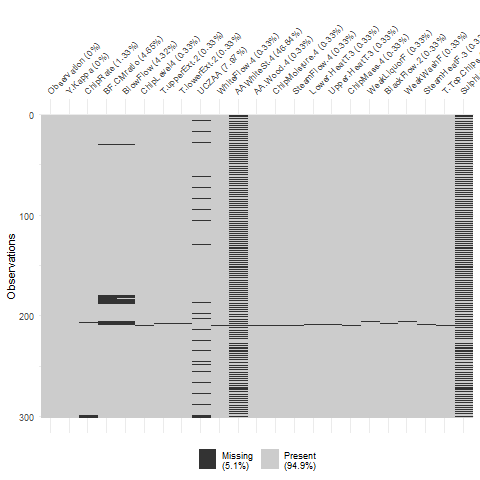

In [37]:
%%R
naniar::vis_miss(Rdf)

In [38]:
# https://stackoverflow.com/questions/39936613/r-corrgram-showing-frequency-pairs-that-have-zero-abundance-pie-method

# Виявлення колінеарних змінних

In [ ]:
#https://r-analytics.blogspot.com/2012/07/blog-post.html#.VsMK87SLTmV

Якщо основне питання в дослідженні полягає в тому, які кваріати впливають на змінну (змінні) відгуки, то найбільшою проблемою, яку необхідно подолати, є колінеарність. Колінеарність – це наявність кореляції між коваріатами. Типовими прикладами є коваріати, такі як вага та довжина або глибина води та відстань до берегової лінії. Якщо ігнорувати коллінеарність, можна отримати заплутаний статистичний аналіз, в якому немає нічого значущого, але де видалення однієї кваріати може зробити інші значущими або навіть змінити знак параметрів, що оцінюються. Ефект колінеарності проілюстрований у контексті множинної лінійної регресії, але аналогічні проблеми існують у дисперсійному аналізі, моделях змішаних ефектів, RDA, CCA, GLM або GAM. Таблиця 1 дає результати множинної лінійної регресії, в якій кількість солончакових горобців, відловлених на досліджуваному ділянці, моделюється як функція каваріат, що описують відносну чисельність різних видів рослин (подробиці див. Gjerdrum, Elphick & Rubega 2005). У другому стовпці таблиці наведено оціночні P-значення t - статистики для кожного параметра регресії, коли в модель включені всі кваріати. Зверніть увагу, що тільки одна коваріату, що відноситься до відсоткового покриття очерету Juncus gerardii, слабко значуща на рівні 5%.

# Виявлення характеру зв'язку між аналізованими змінними

In [39]:
# http://r-analytics.blogspot.de/2012/07/blog-post_08.html#.VsMLArSLTmV

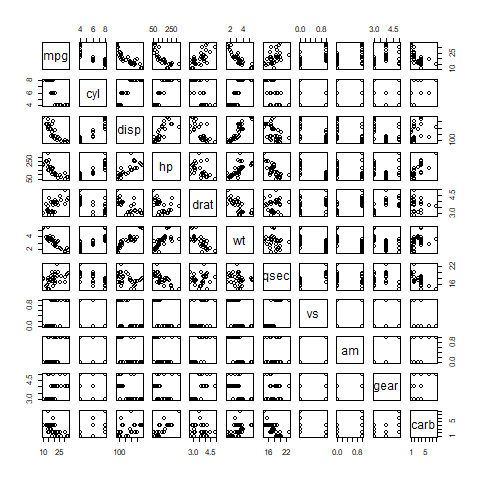

In [41]:
%%R
cars <- mtcars
pairs(cars)

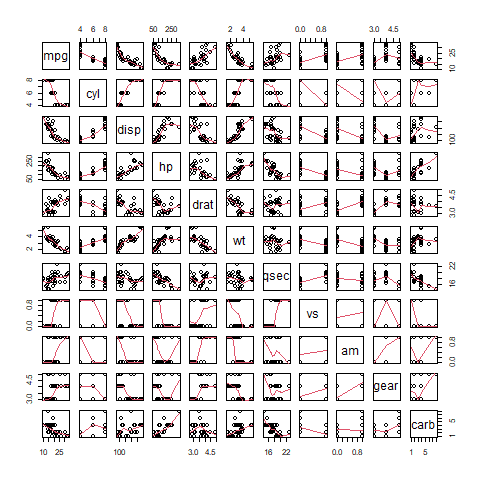

In [42]:
%%R
pairs(cars, panel = panel.smooth)

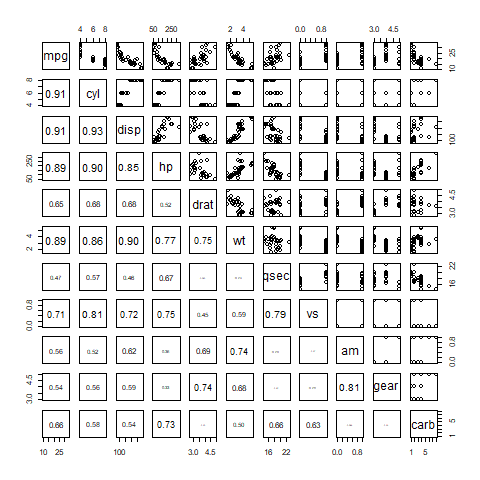

In [43]:
%%R
# Функция для расчета коэффициентов корреляции
panel.cor <- function(x, y, digits = 2, prefix = "", cex.cor, ...)
{
    usr <- par("usr"); on.exit(par(usr))
    par(usr = c(0, 1, 0, 1))
    r <- abs(cor(x, y, method = "spearman"))
    txt <- format(c(r, 0.123456789), digits=digits)[1]
    txt <- paste(prefix, txt, sep = "")
    # эта команда позволяет изменять размер шрифта в соответствии
    # со значением коэффициента корреляции:
    if(missing(cex.cor)) cex.cor <- 0.8/strwidth(txt)
    text(0.5, 0.5, txt, cex = cex.cor * r)
}
 
# Строим сам график:
pairs(cars, lower.panel = panel.cor)

# Виявлення взаємодій між змінними предикторами

Звичайним підходом для відповіді на подібні питання є побудова регресійної моделі, що включає взаємну дію між предикторами. На мові R така модель для даних про довжину крила горобців могла б виглядати, наприклад, так: length ~ weight + sex + month + weight: sex: month. Zuur та ін. (2010) зі своєю статті повідомляють, що взаємодія між вагою, статтю та пори року виявилася статистично значущою. Проте, як зазначають автори, до результатів цього аналізу слід поставитися обережно.

# Виявлення просторово-часових кореляцій серед значень залежної змінної

# Чи є спостереження змінної відгуку незалежними?

Найважливішим припущенням більшості статистичних методів є те, що спостереження незалежні один від одного (Hurlbert, 1984), а це означає, що інформація з будь-якого спостереження не повинна давати інформацію про інше після того, як враховано вплив інших змінних. Цю концепцію краще пояснити на прикладах.

Спостереження з набору даних про чисельність горобців проводили у кількох місцях. Якщо птахи з місць, розташованих близько один до одного, мають характеристики, які більше схожі один на одного, ніж птахи з місць, розділених великими відстанями, ми порушили б припущення про незалежність. Іншим прикладом є вибірка кількох особин однієї сім'ї (наприклад, всіх дитинчат із одного гнізда); ці люди можуть бути більш схожі один на одного, ніж випадкові люди в популяції, тому що вони мають схожу генетичну структуру та схожу історію батьківського забезпечення.

У разі такої залежності статистична модель, використовувана для аналізу даних, має її враховувати. Наприклад, шляхом моделювання будь-яких просторових або тимчасових відносин або шляхом вкладення даних в ієрархічну структуру (наприклад, пташенята можуть бути вкладені в гнізда). Проте перевірити незалежність не завжди легко.